In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
data = pd.read_csv("LRC.data", sep=',')
data.sample()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
13798,J,2,7,2,5,1,14,2,6,5,14,1,10,0,7,0,8


In [5]:
x = data.iloc[:, 1:17]
y = data.select_dtypes(include = [object])
x, y

(       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
 0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
 1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
 2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
 3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
 4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
 ...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
 19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
 19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
 19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
 19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
 19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8
 
 [19999 rows x 16 columns],
        T
 0      I
 1      D
 2      N
 3      G
 4      S
 ...   ..
 19994  D
 19995  C
 19996  T
 19997

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=20)

In [8]:
scaler = StandardScaler()
 
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [10]:
mlp = MLPClassifier(hidden_layer_sizes= (250,300), max_iter = 10000,activation = "logistic")

In [11]:
mlp.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', hidden_layer_sizes=(250, 300),
              max_iter=10000)

In [12]:
y_pred = mlp.predict(xtest)

In [17]:
cm = confusion_matrix(y_pred,ytest)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

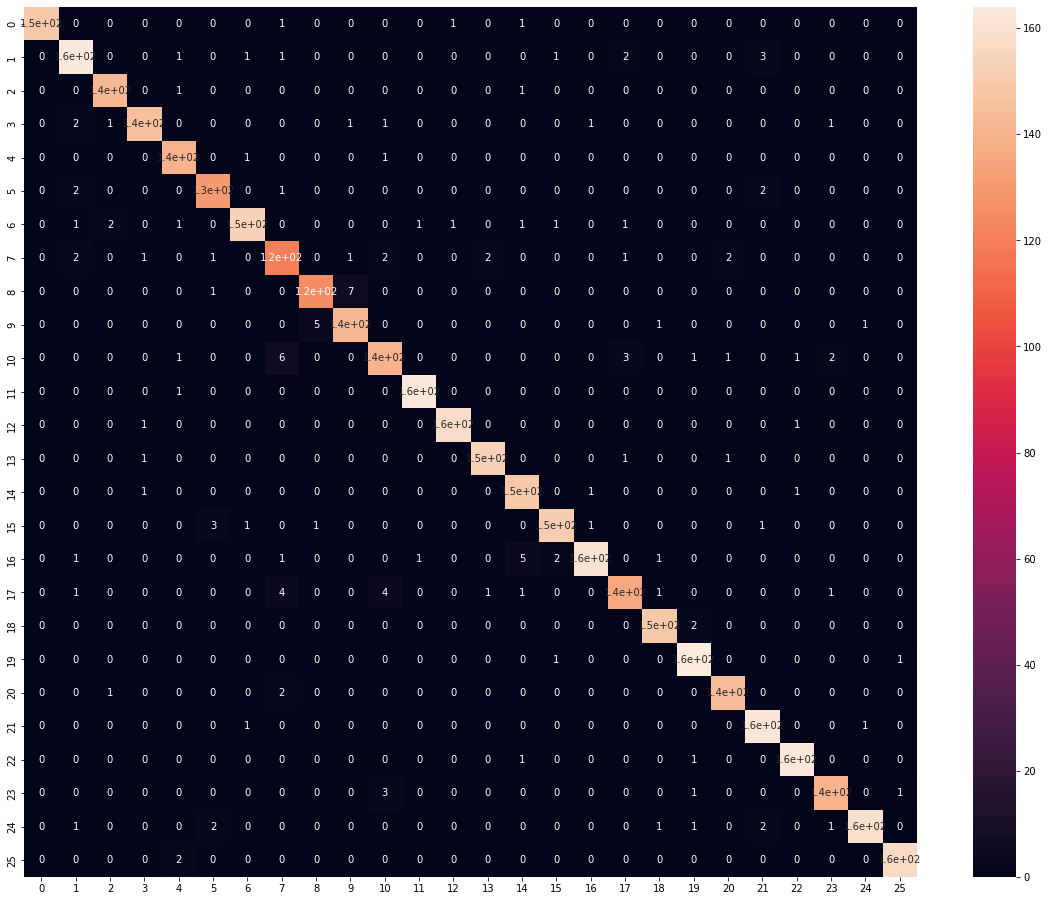

In [26]:
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot = True)